
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import  plotly.express as px


## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
df = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis




** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<Axes: xlabel='purpose', ylabel='count'>

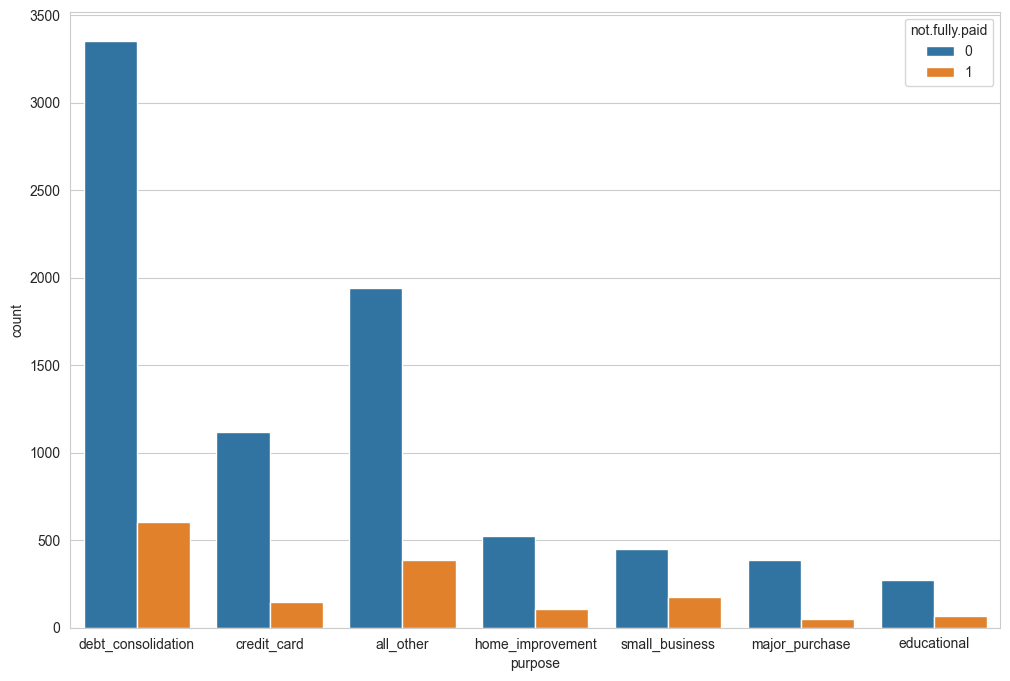

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

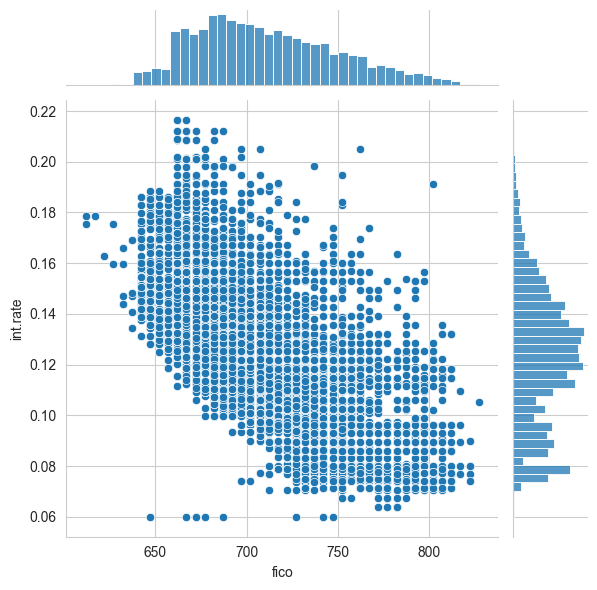

In [7]:
sns.jointplot(data=df, x='fico', y= 'int.rate')

<Axes: >

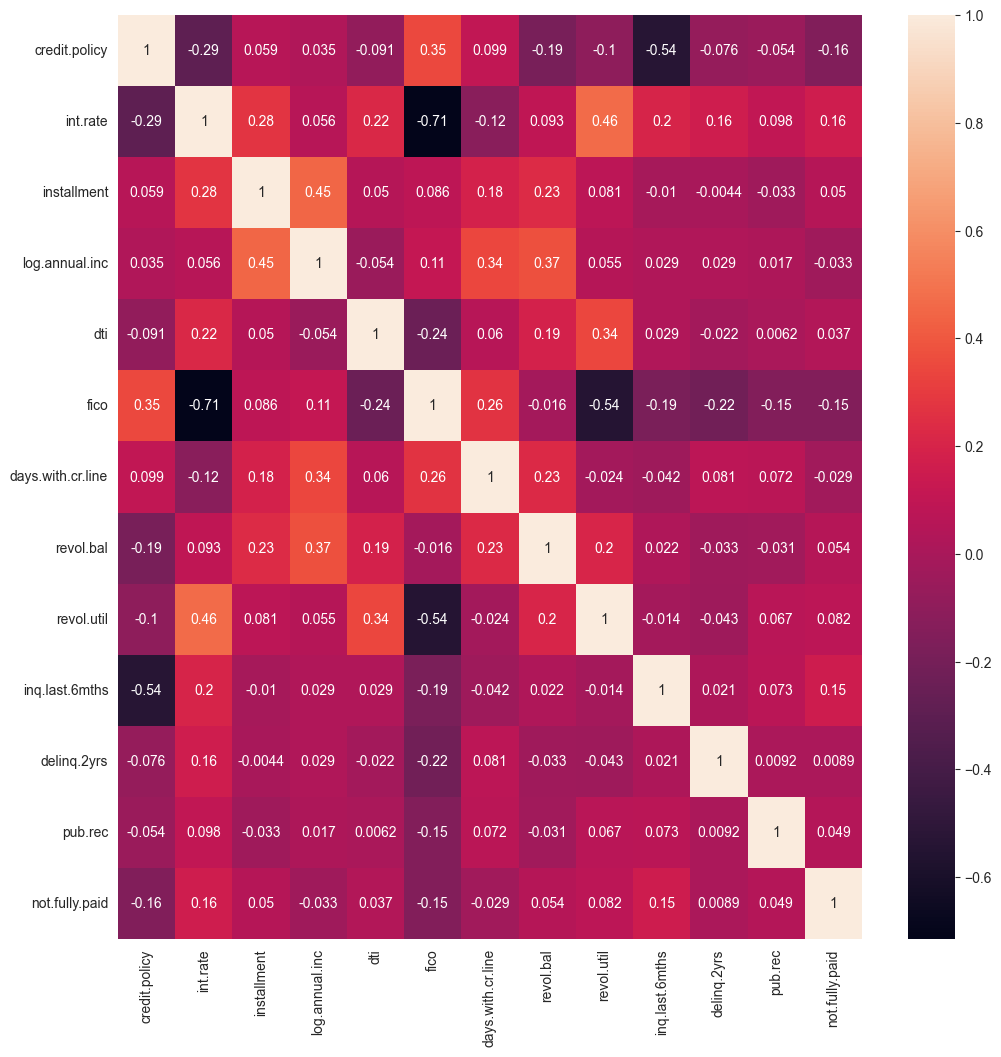

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [9]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [10]:
dummy_purpose = pd.get_dummies(df['purpose'], drop_first=True).astype(int)

In [11]:
df[dummy_purpose.columns]  = dummy_purpose

In [12]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [13]:
df.drop('purpose', axis=1, inplace= True)

In [14]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [19]:
dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [48]:
# check feature importance
feature_importance = pd.DataFrame(  index=X.columns , data= dtree.feature_importances_).reset_index()
feature_importance.columns = ['Feature','Importance']

In [49]:
feature_importance

,Feature,Importance
0,credit.policy,0.025243
1,int.rate,0.132531
2,installment,0.097691
3,log.annual.inc,0.103279
4,dti,0.110061
5,fico,0.065033
6,days.with.cr.line,0.116624
7,revol.bal,0.121506
8,revol.util,0.116915
9,inq.last.6mths,0.039715


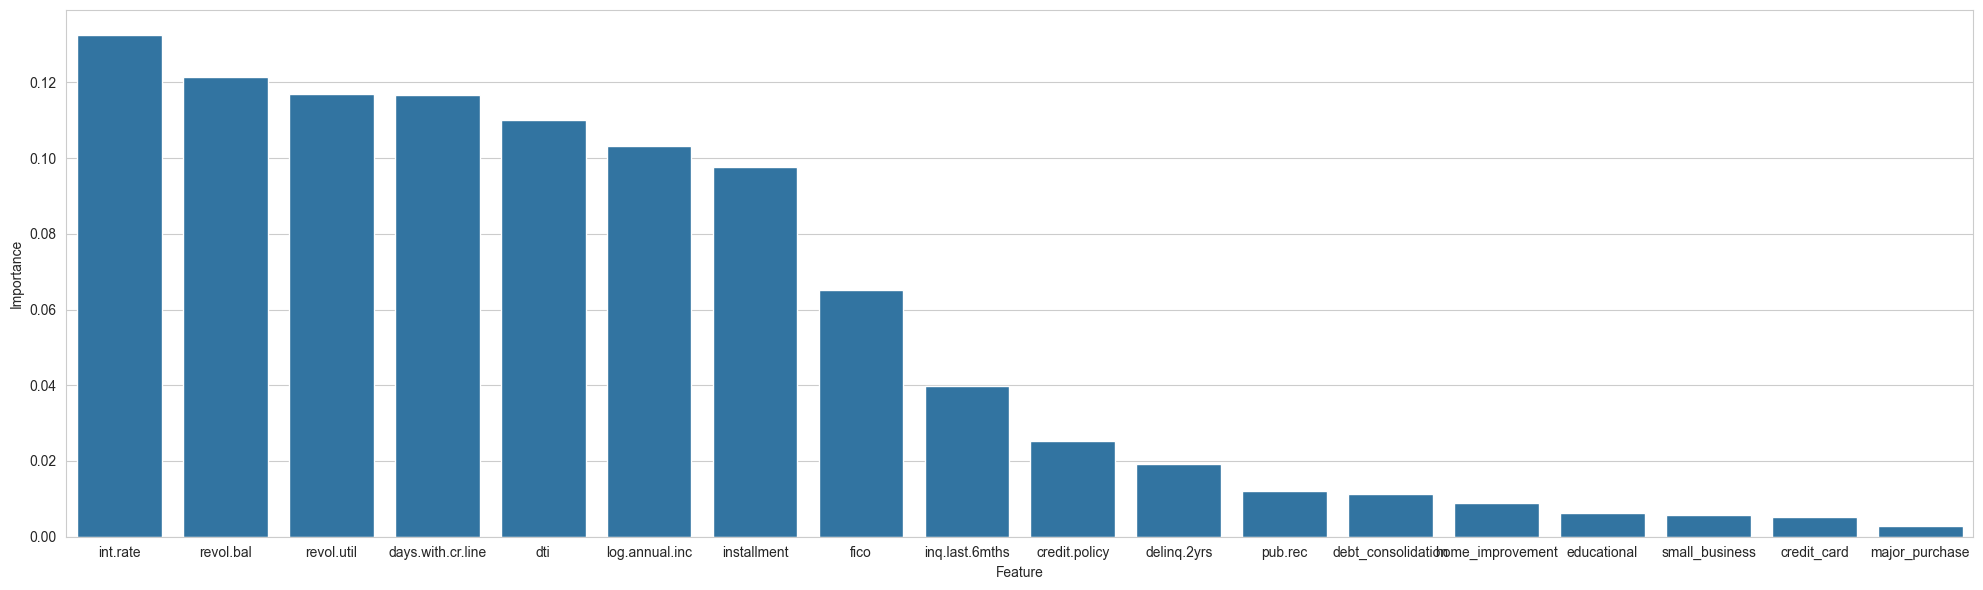

In [56]:
# plot feature importance
plt.figure(figsize=(20,6))
sns.barplot(data = feature_importance.sort_values(by='Importance',ascending=False), x='Feature', y='Importance')
plt.tight_layout()

In [ ]:
# we can drop features with low importance to improve model predictions

In [22]:
predicted_dtree = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
accuracy_score(y_test, predicted_dtree)

0.732428670842032

In [25]:
confusion_matrix(y_test,predicted_dtree)

array([[2002,  406],
       [ 363,  103]])

In [26]:
print(classification_report(y_test, predicted_dtree))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2408
           1       0.20      0.22      0.21       466

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.74      0.73      0.74      2874



## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf = RandomForestClassifier(n_estimators=50, max_features=10, n_jobs=10)

In [29]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=10, n_estimators=50, n_jobs=10)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [30]:
predicted_rf = rf.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [31]:
confusion_matrix(y_test, predicted_rf)

array([[2378,   30],
       [ 448,   18]])

In [32]:
print(classification_report(y_test, predicted_rf))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.38      0.04      0.07       466

    accuracy                           0.83      2874
   macro avg       0.61      0.51      0.49      2874
weighted avg       0.77      0.83      0.77      2874



**Show the Confusion Matrix for the predictions.**

**What performed better the random forest or the decision tree?**

# Great Job!

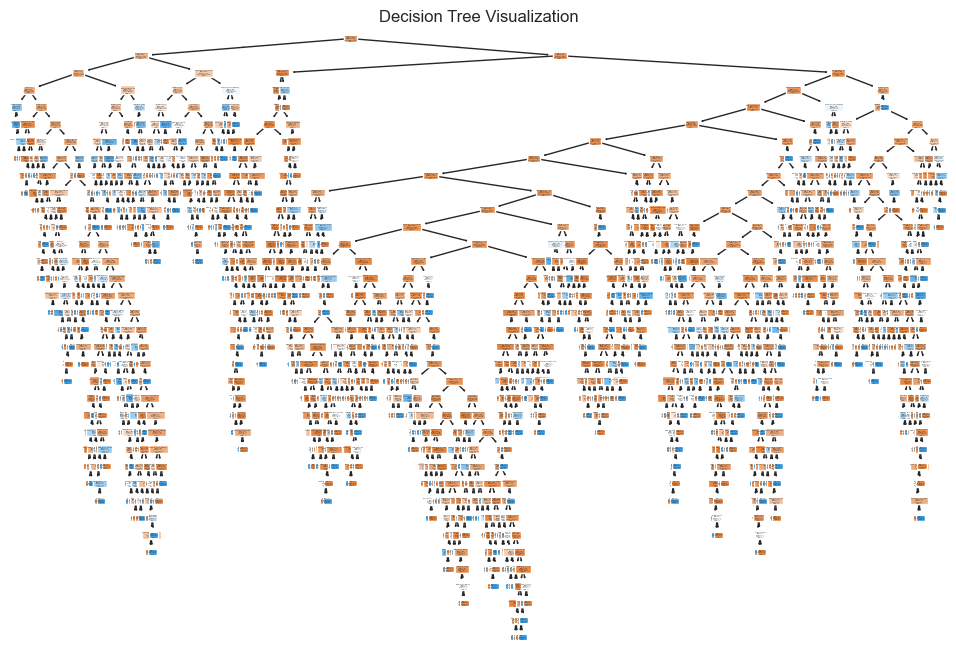

In [33]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, class_names=['1','0'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [34]:
# label encoder, just an example how to use it

df_1 = pd.read_csv('loan_data.csv')

In [35]:
df_1

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
df_1['purpose_le']=le.fit_transform(df_1['purpose'])

In [39]:
df_1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_le
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,2
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,2
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,2
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1


## Next steps to improve model performace
- Add class_weight = 'balanced' while creating model, is good for unbalanced classes
- giving 'class_weight' model pays more attention to the minority class
- use oversampling minority class with SMOTE (Synthetic Minority over sampling technique)

In [57]:
# recreate random forest, trying to improve performance

# add class weight = 'balance'

better_rfc = RandomForestClassifier(class_weight='balanced')
# we can play also we other attributes like: n_estimators=300, max_depth=20

In [58]:
# balance class 1 with smote
# need to install 'imblearn'
!pip install imblearn

  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ------------- -------------------------- 81.9/238.4 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 3.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
# 1. Split first
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
# 2. Apply SMOTE only on training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_1, y_train_1)

In [62]:
# 3. Train on resampled data
better_rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced')

In [63]:
y_pred_rfc_better = better_rfc.predict(X_test_1)

🎯 Key Rule
Never leak synthetic data into your test set!
Only resample after train-test split, and only on training data.

In [65]:
print(classification_report(y_test_1, y_pred_rfc_better))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2408
           1       0.27      0.22      0.24       466

    accuracy                           0.78      2874
   macro avg       0.56      0.55      0.55      2874
weighted avg       0.76      0.78      0.77      2874



<Axes: xlabel='not.fully.paid', ylabel='count'>

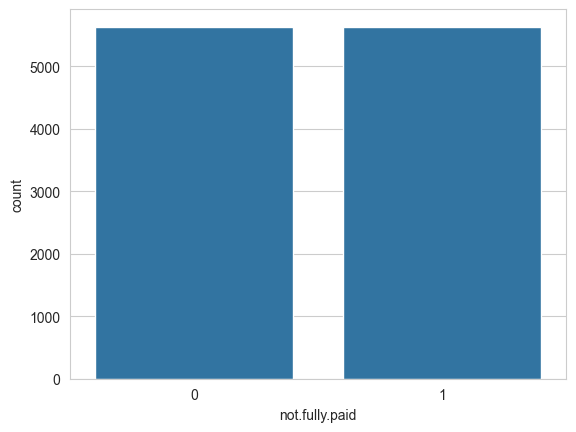

In [74]:
# we got better performance on class 1

# lets check distribution target, after resamplig

sns.countplot(data = y_train_res.reset_index(), x='not.fully.paid')